In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [268]:
df = pd.read_csv("adult_data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 1
Inductive reasoning is applied in inductive logic programming and machine learning. It involves constructing general rules from specific examples or observations. For example, a machine learning model may be trained on a specific dataset and then used inductive reasoning to develop a model capable of making predictions on new, previously unseen data.
Deductive reasoning involves drawing specific conclusions from broad rules. It is widely utilized in algorithm design and software development. For example, a programmer may utilize deductive reasoning to make sure that a program's function performs as intended for all input values.

# 2

In [269]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [270]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [271]:
columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
                       'race', 'sex', 'native-country', 'income']

le = LabelEncoder()

for c in columns:
    df[c] = le.fit_transform(df[c])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


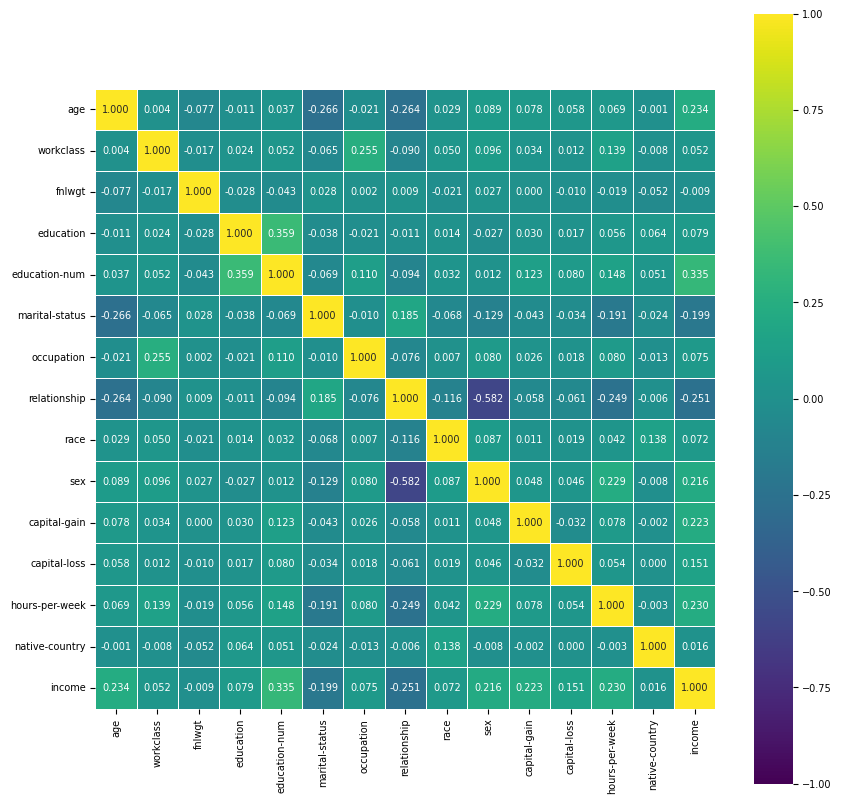

In [272]:
correlation = df.corr()
plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 7})
sns.heatmap(correlation, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, 
            fmt=".3f", square=True, linewidths=.7)
plt.show()

# 3
I put the test size to .2 and implemented standard scaler. Made the max depth 6.

In [273]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler

In [274]:
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=32)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [275]:
dtc = tree.DecisionTreeClassifier(max_depth = 6, random_state=32)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [276]:
dtc.score(X_test, y_test)

0.8499923230462153

In [277]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4989
           1       0.77      0.52      0.62      1524

    accuracy                           0.85      6513
   macro avg       0.82      0.73      0.76      6513
weighted avg       0.84      0.85      0.84      6513



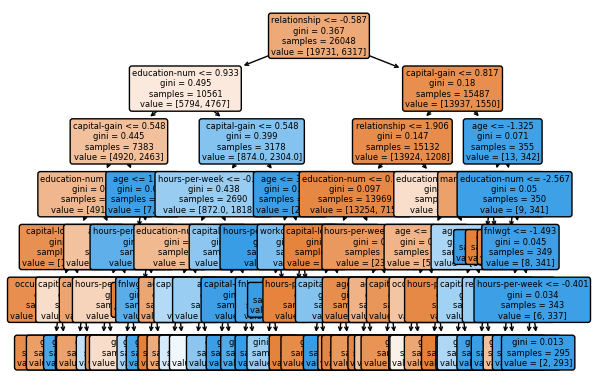

In [278]:
import matplotlib.pyplot as plt
tree.plot_tree(dtc, feature_names = list(X.columns),
               filled=True, fontsize=6, rounded=True)

plt.show()

# 4
Made the n estimator 1000

In [279]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000, random_state=32)
rfc = rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8538307999385844

# 5

In [280]:
from xgboost import XGBClassifier

In [281]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.8486104713649624